In [1]:
import numpy as np
import pandas as pd

In [2]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")

In [4]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
dataset = df.values
X = dataset[:,0:13]
Y = dataset[:,13]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42)

In [8]:
from keras.models import Sequential
from keras.layers import Dense

In [25]:
#Creating the neural network model
import keras
from keras.layers import Dense, Activation,Dropout
from keras.models import Sequential
optimizer = keras.optimizers.SGD(learning_rate=0.001)
model = Sequential()

model.add(Dense(128,activation  = 'relu',input_dim =13))
model.add(Dense(64,activation  = 'relu'))
model.add(Dense(32,activation  = 'relu'))
model.add(Dense(1))


model.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
history = model.fit(X,Y, epochs=100, batch_size=20, verbose=1, validation_split=0.2)

Epoch 1/100
21/21 [==============================] - 1s 10ms/step - loss: 153.8563 - val_loss: 37.1108
Epoch 2/100
21/21 [==============================] - 0s 4ms/step - loss: 90.6401 - val_loss: 161.1610
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 97.5859 - val_loss: 66.0642
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 78.0419 - val_loss: 64.8088
Epoch 5/100
21/21 [==============================] - 0s 4ms/step - loss: 69.2484 - val_loss: 75.8077
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 69.8604 - val_loss: 58.1922
Epoch 7/100
21/21 [==============================] - 0s 4ms/step - loss: 61.5079 - val_loss: 197.3718
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 80.8427 - val_loss: 118.4776
Epoch 9/100
21/21 [==============================] - 0s 4ms/step - loss: 52.9395 - val_loss: 196.9465
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 57.6657 - v

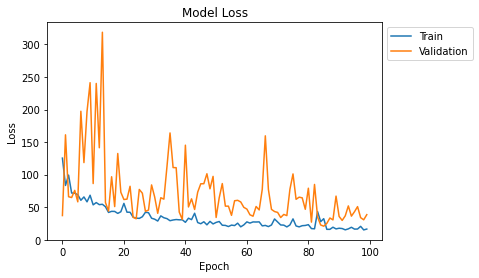

In [28]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

In [29]:
history = model.fit(X_train,y_train, epochs=100, batch_size=20, verbose=1)

Epoch 1/100
18/18 [==============================] - 0s 2ms/step - loss: 327.4050
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 83.6964
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 30.9376
Epoch 4/100
18/18 [==============================] - 0s 1ms/step - loss: 22.3955
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 17.9035
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 16.3098
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 15.1666
Epoch 8/100
18/18 [==============================] - 0s 2ms/step - loss: 14.3188
Epoch 9/100
18/18 [==============================] - 0s 2ms/step - loss: 13.5349
Epoch 10/100
18/18 [==============================] - 0s 2ms/step - loss: 13.2458
Epoch 11/100
18/18 [==============================] - 0s 2ms/step - loss: 12.4497
Epoch 12/100
18/18 [==============================] - 0s 2ms/step - loss: 12.1184
Epoch 13/100
18/18 [====

In [31]:
#Prediction on the test dataset
y_pred = model.predict(X_test)

In [32]:
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print(rmse)

3.2807444160375603


In [34]:
import tensorflow as tf

In [36]:
mse =tf.keras.losses.MSE(
    y_test, y_pred
)

In [37]:
print(mse)

tf.Tensor(
[ 90.990105 251.73198   99.37507   77.66023  100.17323   80.04697
  79.81105   94.677414  94.54874   77.34339   80.466255  77.7498
 368.55978   84.12882   87.085396  75.68235   76.65228  196.99231
 701.4935   137.86224   90.81199  101.59667  124.219635  74.78387
 102.92411   92.66296   79.55725  154.69194   75.170105  80.85214
  78.91585   77.18495   89.7486    91.424545 116.076096  91.48593
 179.81424   74.54757   74.53083   79.45304   94.06362  122.40178
 912.7167    95.96881   84.54924  111.642426 114.41528   88.366356
  79.21529   85.09474   77.3658   267.8662    88.41538   83.83753
 569.315     76.14398  104.18232  237.40816   86.597595 114.9437
 104.150055 253.52382  190.67169   88.584656  76.1241    82.19912
 116.31453   80.61638  149.71619  117.65721   76.10592  117.855
 244.63641   74.80929   76.19657  297.9836    76.89986  766.86896
 164.97784  193.30112   81.17359  168.78506   82.1809   184.0474
  76.11849  111.82909  111.74463   79.86356   85.19822   80.488815
  

In [38]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.8555517813166363
